# Programming with Python

## Episode 2 - Analyzing Data from Multiple Files

Teaching: 20 min, 
Exercises: 20 min 

## Objectives
- Use a library function to get a list of filenames that match a wildcard pattern.
- How can I do the same operations on many different files?
- Write a for loop to process multiple files.

We now have almost everything we need to process all our data files. The only thing that’s missing is a library with a rather unpleasant name `glob`, let's import it.
```
import glob
```

In [2]:
import glob

The `glob` library contains a function, also called `glob`, that finds files and directories whose names match a pattern. We provide those patterns as strings which may include *wildcards*: 

- the wildcard character `*` matches zero or more of any character
- the wildcard character `?` matches a single character.

We can use this to get the names of all the CSV files in the `data` directory:
```
print(glob.glob('data/inflammation*.csv'))
```

In [9]:
print(glob.glob('data/i*.csv'))    #*i, in, inflamm, whatever, just has to be similar to the file names for glob to find it
print()
filelist = glob.glob('data/i*.csv')
print(sorted(filelist))

['data/inflammation-10.csv', 'data/inflammation-03.csv', 'data/inflammation-07.csv', 'data/inflammation-01.csv', 'data/inflammation-05.csv', 'data/inflammation-12.csv', 'data/inflammation-02.csv', 'data/inflammation-08.csv', 'data/inflammation-06.csv', 'data/inflammation-04.csv', 'data/inflammation-11.csv', 'data/inflammation-09.csv']

['data/inflammation-01.csv', 'data/inflammation-02.csv', 'data/inflammation-03.csv', 'data/inflammation-04.csv', 'data/inflammation-05.csv', 'data/inflammation-06.csv', 'data/inflammation-07.csv', 'data/inflammation-08.csv', 'data/inflammation-09.csv', 'data/inflammation-10.csv', 'data/inflammation-11.csv', 'data/inflammation-12.csv']


`glob.glob`’s result is a list of matching filenames and directory paths (in arbitrary order). 

This means we can loop over it to do something with each filename in turn. In our case, the “something” we want to do is generate a set of plots for each file in our complete inflammation dataset. 

If we want to start by analyzing just the first three files in alphabetical order, we can use the built-in `sorted` function to generate a new sorted list from the `glob.glob` output:

```
import numpy
import matplotlib.pyplot

filenames = sorted(glob.glob('data/inflammation*.csv'))
filenames = filenames[0:3]

print(filenames)
```

In [29]:
import numpy
import matplotlib.pyplot
import glob

filenames = sorted(glob.glob('data/inflammation*.csv'))
filenames = filenames[0:3]
print(filenames)

for filename in filenames:
#     print(filename)
    data = numpy.loadtxt(fname=filename, delimiter=',')
    print()
    print(filename, 'total sum:', numpy.sum(data))
    print(filename, 'sum per day:\n', numpy.sum(data, axis=0))
#     print(numpy.sum(data, axis=0).shape)      ## 'len' in line leos looks nicer when printed
    print(len(numpy.sum(data, axis=0)))
#     print(data)
print()
print('final data variable:\n', data)
    


['data/inflammation-01.csv', 'data/inflammation-02.csv', 'data/inflammation-03.csv']

data/inflammation-01.csv total sum: 14757.0
data/inflammation-01.csv sum per day:
 [  0.  27.  67. 105. 146. 189. 228. 233. 314. 331. 357. 354. 501. 464.
 502. 570. 575. 638. 694. 741. 795. 718. 662. 610. 600. 520. 549. 435.
 440. 395. 364. 357. 307. 216. 198. 214. 149.  90.  68.  34.]
40

data/inflammation-02.csv total sum: 14378.0
data/inflammation-02.csv sum per day:
 [  0.  30.  56.  95. 158. 160. 215. 248. 287. 338. 373. 390. 438. 454.
 485. 558. 566. 603. 627. 691. 763. 667. 648. 600. 614. 532. 482. 492.
 456. 386. 368. 333. 298. 220. 230. 179. 148.  90.  68.  32.]
40

data/inflammation-03.csv total sum: 10091.0
data/inflammation-03.csv sum per day:
 [  0.   0.  35.  92.  24. 144. 194. 216. 177. 335. 197. 467. 248. 181.
 541. 468. 253. 585. 512. 469. 406. 474. 268. 511. 501. 259. 453. 241.
 456. 191. 254. 253. 142. 187. 169.  76.  84.  28.   0.   0.]
40

final data variable:
 [[0. 0. 0. ... 0. 0

and now we can loop over each filename in turn using the code from an earlier episode to product a set of plots for each.
```
for f in filenames:
    print(f)

    data = numpy.loadtxt(fname=f, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()
```

data/inflammation-01.csv


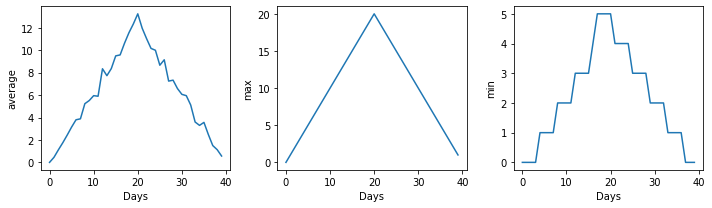

data/inflammation-02.csv


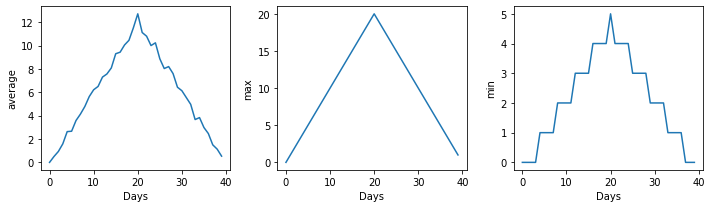

data/inflammation-03.csv


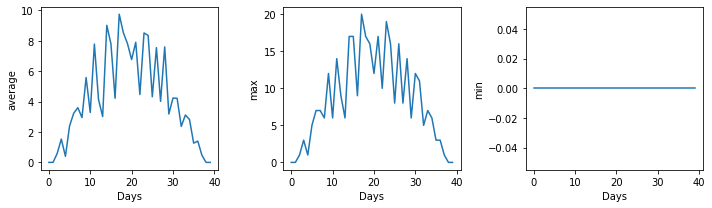

data/inflammation-04.csv


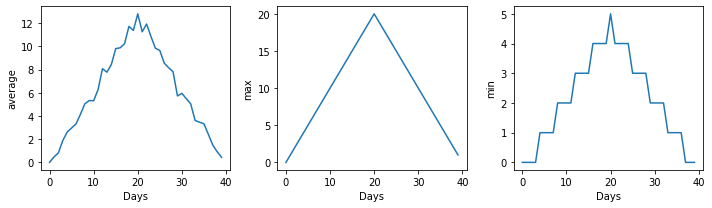

data/inflammation-05.csv


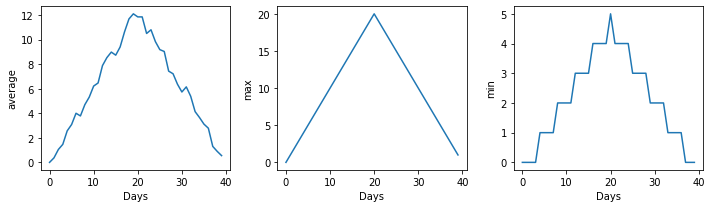

data/inflammation-06.csv


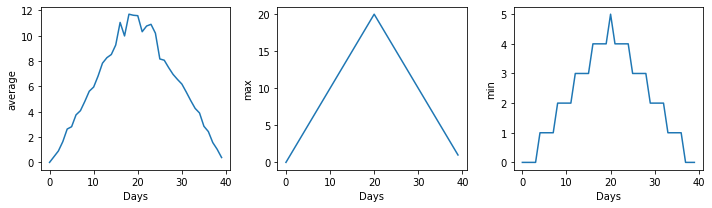

data/inflammation-07.csv


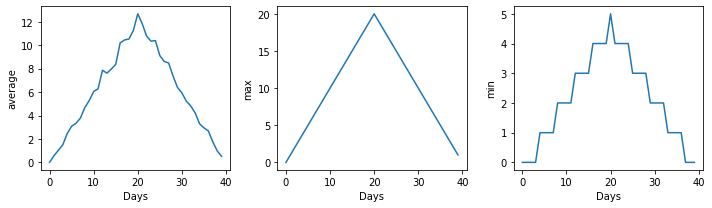

data/inflammation-08.csv


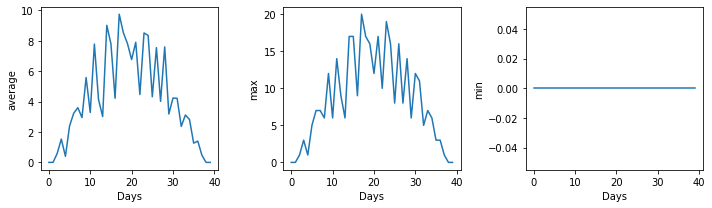

data/inflammation-09.csv


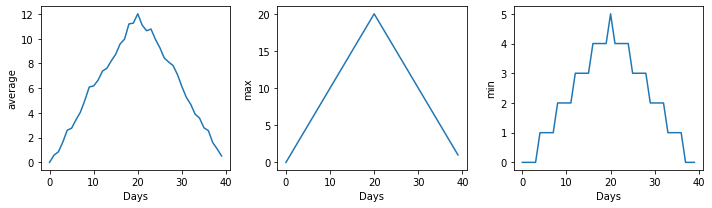

data/inflammation-10.csv


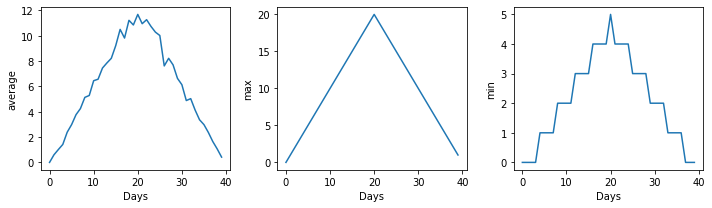

data/inflammation-11.csv


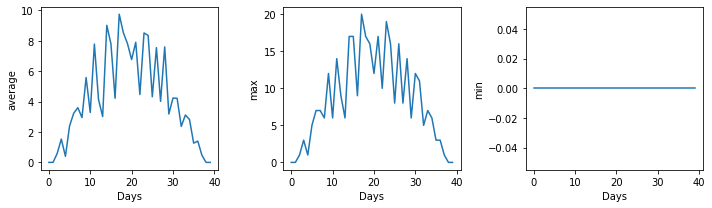

data/inflammation-12.csv


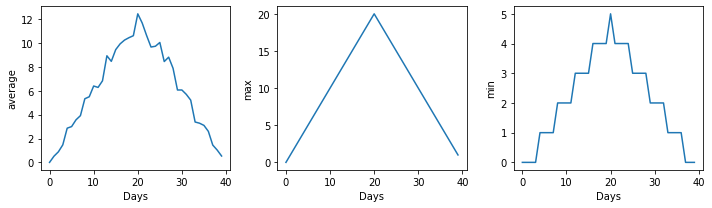

In [44]:
for f in filenames:
    print(f)

    data = numpy.loadtxt(fname=f, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    subplot1 = fig.add_subplot(1, 3, 1)
    subplot2 = fig.add_subplot(1, 3, 2)
    subplot3 = fig.add_subplot(1, 3, 3)

    subplot1.set_ylabel('average'), subplot1.set_xlabel('Days')
    subplot1.plot(numpy.mean(data, axis=0))

    subplot2.set_ylabel('max'), subplot2.set_xlabel('Days')
    subplot2.plot(numpy.max(data, axis=0))

    subplot3.set_ylabel('min'), subplot3.set_xlabel('Days')
    subplot3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()            #see Introduction lesson for figure code explanation

Sure enough, the maxima of the first two data sets show exactly the same ramp as the first, and their minima show the same staircase structure; a different situation has been revealed in the third dataset, where the maxima are a bit less regular, but the minima are consistently zero - probably indicating an issue in our data.

## Excercises

#### Plotting differences between data files
Plot the difference between the average of the first dataset and the average of the second dataset, i.e., the difference between the leftmost plot of the first two figures.

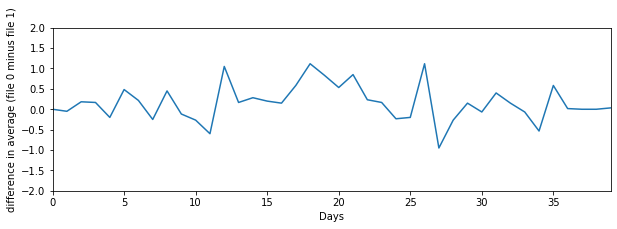

In [64]:
import glob
import numpy as np
import matplotlib.pyplot as plt


# Grab all the filenames and sort them 
filenames = sorted(glob.glob('data/inflammation*.csv'))

# load the first 2 data files
data0 = np.loadtxt(fname=filenames[0], delimiter=',')
data1 = np.loadtxt(fname=filenames[1], delimiter=',')

# create a figure
fig = plt.figure(figsize=(10.0, 3.0))

data0_mean = np.mean(data0, axis=0)
data1_mean = np.mean(data1, axis=0)

data_mean_diff = data0_mean - data1_mean

plt.ylabel('difference in average (file 0 minus file 1)'), plt.xlabel('Days')
plt.plot(data_mean_diff)
plt.ylim(-2,2)
plt.xlim(0,39)


plt.show()

#### Generate Composite Statistics
Use each of the files once, to generate a dataset containing values averaged over all patients:


In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt

filenames = glob.glob('data/inflammation*.csv')
composite_data = np.zeros((60,40))

for f in filenames:
    #
    # read each file (np.loadtxt) and add it to the composite_data vector
    #
    
    
# and rescale it
composite_data/=len(filenames)

print(composite_data)

and now plot the stats for the composite date it using `matplotlib`

In [ ]:
fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(np.mean(composite_data, axis=0))

axes2.set_ylabel('max')
axes2.plot(np.max(composite_data, axis=0))

axes3.set_ylabel('min')
axes3.plot(np.min(composite_data, axis=0))

fig.tight_layout()

plt.show()

## Key Points
Use `glob.glob(pattern)` to create a list of files whose names match a pattern.

Use `*` in a pattern to match zero or more characters, and ? to match any single character.

### Save, and version control your changes

- save your work: `File -> Save`
- add all your changes to your local repository: `Terminal -> git add .`
- commit your updates a new Git version:  `Terminal -> git commit -m "End of Episode 2"`
- push your lastest commits to GitHub: `Terminal -> git push`